## Project Summary
This project provides a data-driven analysis of a loan application dataset. It uses **Supervised learning algorithms** and **unsupervised learning algorithms** to support business leaders in the bank to leverage AI for potential growth. It has two parts:

### Part A
An Artificial Neural Network (ANN) analysis is used to predict loan sanction probabilities and to identify the factors that increase the likelihood of loan approval.

### Part B
Hierarchical cluster and K-means cluster analysis are applied to develop a segment-based strategy for financing product targeting.

## Data Cleaning and Preparation 

In [206]:
# instal library
import pandas as pd
import numpy as np

In [207]:
# read the data file
loan_data = pd.read_csv('loan_data.csv')
loan_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [208]:
# see basic info of the dataset
loan_data.shape
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [209]:
# check missing value
loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
# fill the missing value in categorical columns
categorical_cols_missing = ['Gender','Dependents','Self_Employed','Credit_History']

for col in categorical_cols_missing:
    col_mode = loan_data[col].mode()[0]
    loan_data[col] = loan_data[col].fillna(col_mode)

In [105]:
Loan_Amount_Term_mean = loan_data['Loan_Amount_Term'].mean()
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(Loan_Amount_Term_mean)

In [106]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
# change the dttype
loan_data['Credit_History'] = loan_data['Credit_History'].astype('object')

In [108]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,340.864865
std,1419.813818,2340.818114,28.358464,67.549811
min,150.000000,0.000000,9.000000,12.000000
25%,2600.000000,0.000000,90.000000,360.000000
50%,3333.000000,983.000000,110.000000,360.000000
75%,4288.000000,2016.000000,127.000000,360.000000
max,9703.000000,33837.000000,150.000000,480.000000


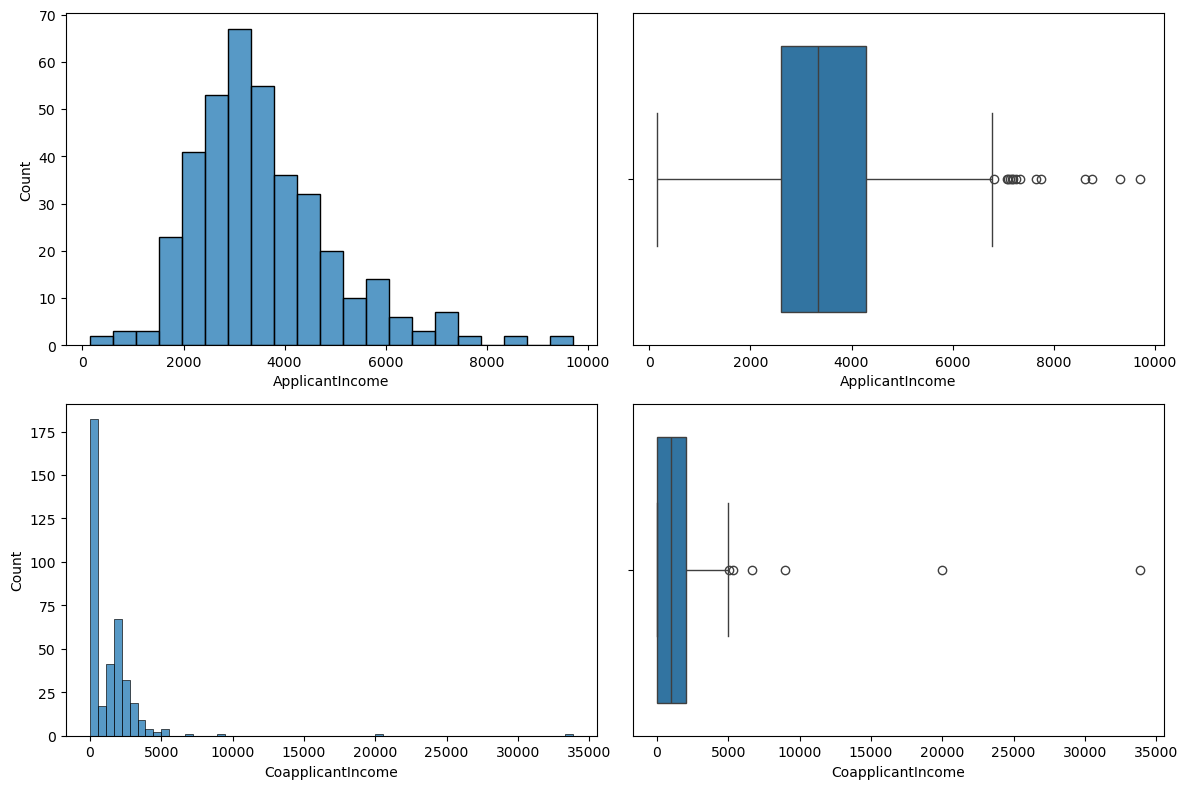

In [203]:
# check the outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='ApplicantIncome', data=loan_data, ax=axes[0,0])
sns.boxplot(x='ApplicantIncome', data=loan_data, ax=axes[0,1])
sns.histplot(x='CoapplicantIncome', data=loan_data, ax=axes[1,0])
sns.boxplot(x='CoapplicantIncome', data=loan_data, ax=axes[1,1])
plt.tight_layout()
plt.show()

In [159]:
# identify the index of the ex
loan_data.sort_values('CoapplicantIncome',ascending=False)

### Loan_ID: LP002893 and LP002297 have extreme coapplicantincome, therefore they are droppeed for later analysis

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
364,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
256,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
79,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
324,LP002648,Male,Yes,0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,N
319,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,LP002236,Male,Yes,2,Graduate,No,4566,0.0,100.0,360.0,1.0,Urban,N
242,LP002237,Male,No,1,Graduate,No,3667,0.0,113.0,180.0,1.0,Urban,Y
93,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
245,LP002250,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,Rural,Y


In [160]:
# drop two extreme values in Coapplicantincome variable
loan_data_clean = loan_data.drop(index=[364,256])

In [162]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            379 non-null    object 
 1   Gender             379 non-null    object 
 2   Married            379 non-null    object 
 3   Dependents         379 non-null    object 
 4   Education          379 non-null    object 
 5   Self_Employed      379 non-null    object 
 6   ApplicantIncome    379 non-null    int64  
 7   CoapplicantIncome  379 non-null    float64
 8   LoanAmount         379 non-null    float64
 9   Loan_Amount_Term   379 non-null    float64
 10  Credit_History     379 non-null    object 
 11  Property_Area      379 non-null    object 
 12  Loan_Status        379 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 41.5+ KB


In [164]:
# check duplicates
duplicates = loan_data_clean[loan_data_clean.duplicated()]
duplicates

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## Part A: ANN for loan prediction

ANN
ANN Accuracy: 0.8508771929824561

Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.55      0.68        33
           Y       0.84      0.98      0.90        81

    accuracy                           0.85       114
   macro avg       0.87      0.76      0.79       114
weighted avg       0.86      0.85      0.84       114


 Important features (ANN):
                    Feature  Importance Mean
11       Credit_History_1.0         0.169298
12  Property_Area_Semiurban         0.032456
1         CoapplicantIncome         0.019298
9    Education_Not Graduate         0.011404
3          Loan_Amount_Term         0.011404
4               Gender_Male         0.010526
7              Dependents_2         0.004386
0           ApplicantIncome         0.003509
13      Property_Area_Urban         0.002632
5               Married_Yes         0.002632
8             Dependents_3+         0.001754
6              Dependents_1         0.000877

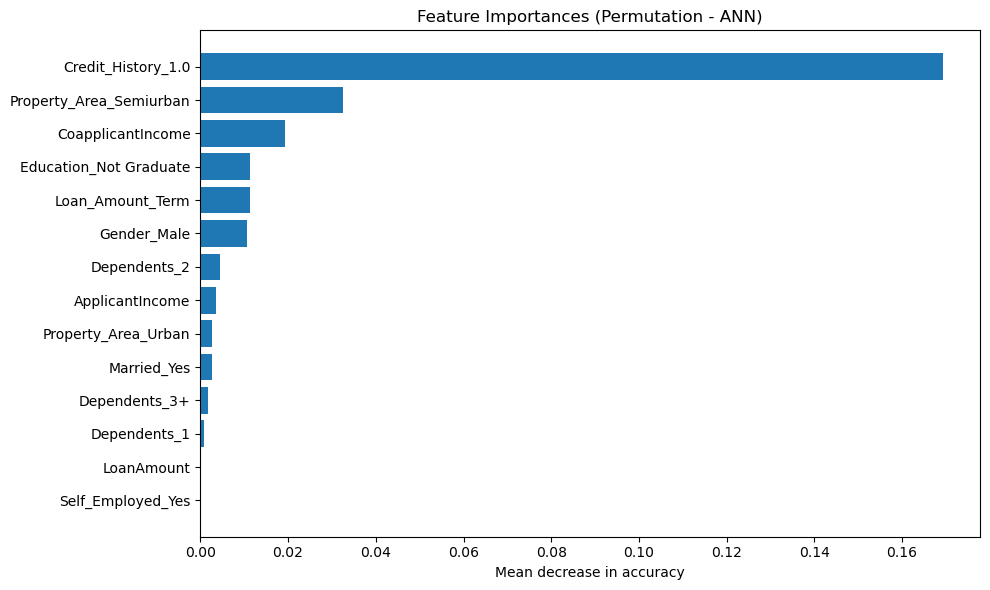

In [186]:
# ANN for Loan prediction

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Step 2: Prepare data
X = loan_data_clean.drop(columns=['Loan_ID','Loan_Status'], errors='ignore')
y = loan_data_clean['Loan_Status']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop variables
# columns_to_drop = [
#   
# ]
# X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Scale features (important for ANN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and train ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=2000, random_state=42, activation='logistic')
mlp_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
print("ANN")
y_pred = mlp_model.predict(X_test_scaled)
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Permutation importance
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 10: Show top important features
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)


print("\n Important features (ANN):")
print(importances_df.head(30))

# Step 11: Optional – Plot importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Feature Importances (Permutation - ANN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Insight from ANN analysis
Model evaluation
- The ANN model achieved an overall accuracy of 85.09%.
- The classification shows that the model is good at identifying 'Yes' (loan approval), with a recall of 0.98. However, the model performs poorly on the 'No' (loan reject), with a recall of 0.55. Therefore, the model is highly effective at predicting low-risk applicants (Class Y) but struggles to identify high-risk applicants (Class N). This could lead to a critical issue for a financial application, as it could cause significant financial loss. This imbalanced performance is likely due to the unequal distribution of DV in the data set.
- The most influential factors impacting loan sanction are credit history, property area, coapplicant income and education status. 

## Male and Female comparison in loan sanction

In [236]:
# subset female data
Loan_female = loan_data_clean[loan_data_clean['Gender'] == 'Female']
Loan_female.info()
Loan_female.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 11 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            85 non-null     object 
 1   Gender             85 non-null     object 
 2   Married            85 non-null     object 
 3   Dependents         85 non-null     object 
 4   Education          85 non-null     object 
 5   Self_Employed      85 non-null     object 
 6   ApplicantIncome    85 non-null     int64  
 7   CoapplicantIncome  85 non-null     float64
 8   LoanAmount         85 non-null     float64
 9   Loan_Amount_Term   85 non-null     float64
 10  Credit_History     85 non-null     object 
 11  Property_Area      85 non-null     object 
 12  Loan_Status        85 non-null     object 
 13  Cluster_4          85 non-null     int32  
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 9.6+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Cluster_4
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,3487.717647,806.070588,102.105882,355.371701,0.694118
std,1306.364454,1436.549891,29.860000,47.189292,1.046804
min,210.000000,0.000000,9.000000,84.000000,0.000000
25%,2600.000000,0.000000,84.000000,360.000000,0.000000
50%,3416.000000,0.000000,108.000000,360.000000,0.000000
75%,4166.000000,1632.000000,122.000000,360.000000,2.000000
max,8624.000000,8980.000000,150.000000,480.000000,3.000000


ANN
ANN Accuracy: 0.8846153846153846

Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.62      0.77         8
           Y       0.86      1.00      0.92        18

    accuracy                           0.88        26
   macro avg       0.93      0.81      0.85        26
weighted avg       0.90      0.88      0.88        26


 Important features (ANN):
                    Feature  Importance Mean
9        Credit_History_1.0     2.192308e-01
0           ApplicantIncome     1.384615e-01
2                LoanAmount     1.230769e-01
4               Married_Yes     1.115385e-01
10  Property_Area_Semiurban     8.461538e-02
8         Self_Employed_Yes     8.076923e-02
7    Education_Not Graduate     5.000000e-02
1         CoapplicantIncome     3.076923e-02
3          Loan_Amount_Term     1.923077e-02
11      Property_Area_Urban     7.692308e-03
6              Dependents_2     0.000000e+00
5              Dependents_1    -2.220446e-17

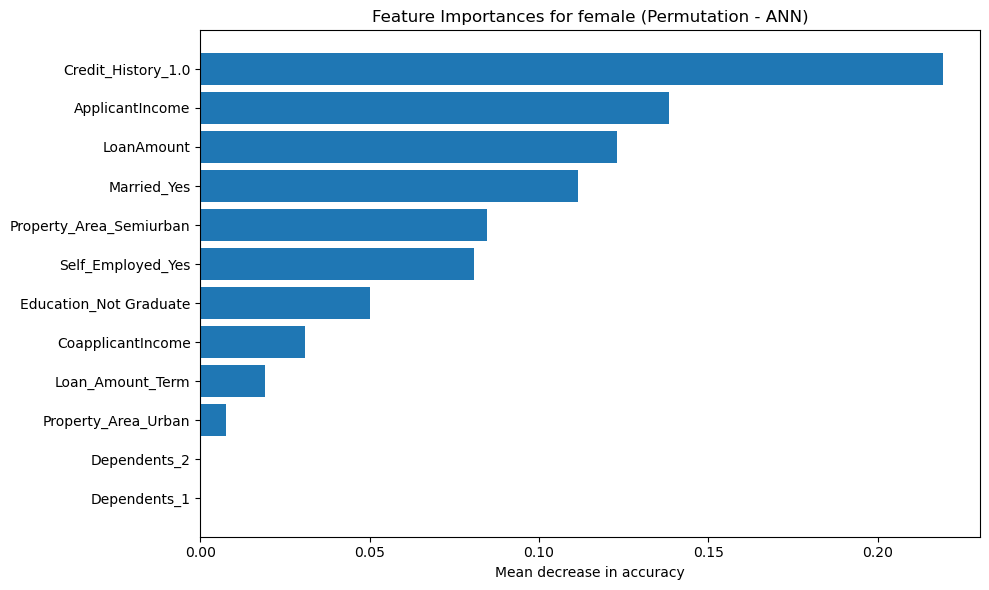

In [239]:
# ANN for female Loan prediction

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Step 2: Prepare data
X = Loan_female.drop(columns=['Loan_ID','Loan_Status','Gender','Cluster_4'], errors='ignore')
y = Loan_female['Loan_Status']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop variables
# columns_to_drop = [
#   
# ]
# X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Scale features (important for ANN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and train ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=3000, random_state=42, activation='logistic')
mlp_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
print("ANN")
y_pred = mlp_model.predict(X_test_scaled)
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Permutation importance
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 10: Show top important features
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)


print("\n Important features (ANN):")
print(importances_df.head(30))

# Step 11: Optional – Plot importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Feature Importances for female (Permutation - ANN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [237]:
# subset male data
Loan_male = loan_data_clean[loan_data_clean['Gender'] == 'Male']
Loan_male.info()
Loan_male.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            294 non-null    object 
 1   Gender             294 non-null    object 
 2   Married            294 non-null    object 
 3   Dependents         294 non-null    object 
 4   Education          294 non-null    object 
 5   Self_Employed      294 non-null    object 
 6   ApplicantIncome    294 non-null    int64  
 7   CoapplicantIncome  294 non-null    float64
 8   LoanAmount         294 non-null    float64
 9   Loan_Amount_Term   294 non-null    float64
 10  Credit_History     294 non-null    object 
 11  Property_Area      294 non-null    object 
 12  Loan_Status        294 non-null    object 
 13  Cluster_4          294 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 33.3+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Cluster_4
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,3616.085034,1239.077959,105.877551,336.540541,1.163265
std,1451.565086,1278.406256,27.989125,72.091131,1.197499
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2600.000000,0.000000,94.000000,360.000000,0.000000
50%,3333.000000,1283.500000,110.500000,360.000000,1.000000
75%,4327.250000,2051.000000,128.000000,360.000000,2.000000
max,9703.000000,6666.000000,150.000000,480.000000,3.000000


ANN
ANN Accuracy: 0.8426966292134831

Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.48      0.63        25
           Y       0.83      0.98      0.90        64

    accuracy                           0.84        89
   macro avg       0.88      0.73      0.77        89
weighted avg       0.86      0.84      0.82        89


 Important features (ANN):
                    Feature  Importance Mean
10       Credit_History_1.0     1.876404e-01
3          Loan_Amount_Term     2.022472e-02
11  Property_Area_Semiurban     1.348315e-02
0           ApplicantIncome     1.235955e-02
8    Education_Not Graduate     1.011236e-02
6              Dependents_2     7.865169e-03
2                LoanAmount     3.370787e-03
5              Dependents_1     3.370787e-03
4               Married_Yes     1.123596e-03
12      Property_Area_Urban    -2.220446e-17
9         Self_Employed_Yes    -1.123596e-03
7             Dependents_3+    -3.370787e-03

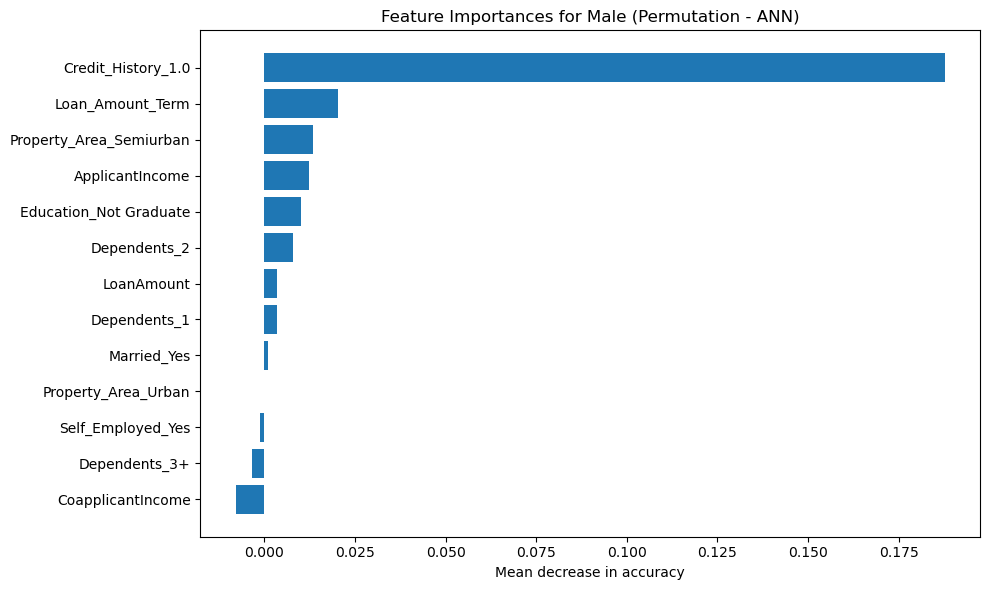

In [238]:
# ANN for female Loan prediction

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Step 2: Prepare data
X = Loan_male.drop(columns=['Loan_ID','Loan_Status','Gender','Cluster_4'], errors='ignore')
y = Loan_male['Loan_Status']

# Step 3: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Drop variables
# columns_to_drop = [
#   
# ]
# X_encoded.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Step 6: Scale features (important for ANN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build and train ANN model
mlp_model = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=3000, random_state=42, activation='logistic')
mlp_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
print("ANN")
y_pred = mlp_model.predict(X_test_scaled)
print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Permutation importance
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 10: Show top important features
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': result.importances_mean
}).sort_values(by='Importance Mean', ascending=False)


print("\n Important features (ANN):")
print(importances_df.head(30))

# Step 11: Optional – Plot importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'])
plt.xlabel('Mean decrease in accuracy')
plt.title('Feature Importances for Male (Permutation - ANN)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Discussion
### Factors impacting Male and Female loan sanction
- A good credit history significantly impacts both male and female applicants

### Gender bias for loan sanction
- For female applicants, the model will examine more factors for a comprehensive risk assessment compared to male applicants.
- Female applicants who have higher income, are married, and self-employed are preferred for loan sanction as they show better repayment capability.
- This gender bias highlights the reality of the gender pay gap, where females earn less than males on average. In response to this socio-economic disparity, banks tend to prefer female applicants with stronger creditworthiness as part of their risk mitigation strategies.

## Part B: Cluster analysis for segmented targeting strategies

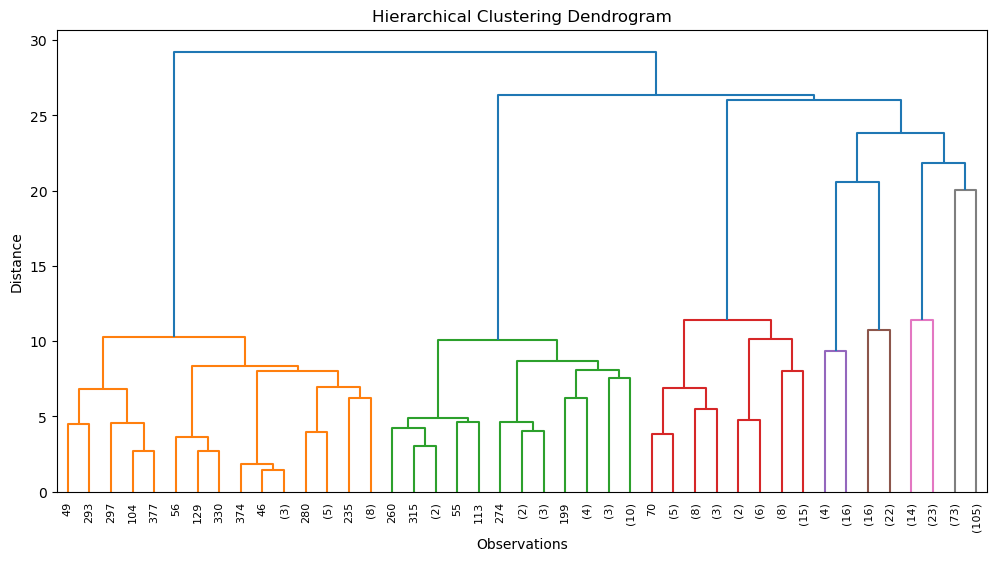

In [190]:
### cluster analysis hierarchical
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# 1. Drop demographic and DV variables
columns_to_exclude = ['Loan_ID','Loan_Status','Gender']  

cluster_vars = loan_data_clean.drop(columns=columns_to_exclude, errors='ignore')

# 2. One-hot encode categorical variables
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# 3. Standardise data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_vars_encoded)

# 4. Create linkage matrix using Ward’s method
Z = linkage(X_scaled, method='ward')

# 5. Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # truncate for readability
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# cluster 2-6 are all possible from the dendrogram

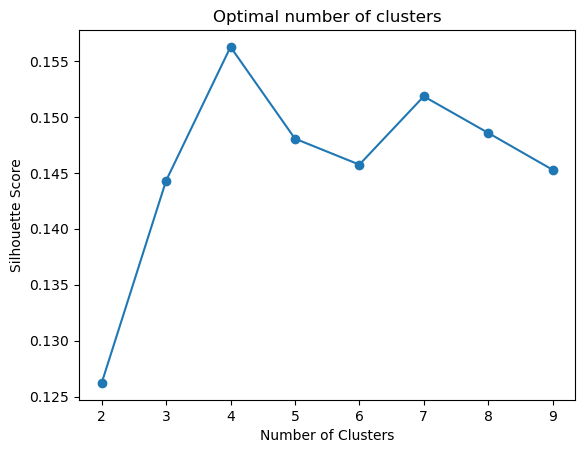

In [192]:
### cluster analysis K-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Select relevant variables for clustering
cluster_vars = loan_data_clean.drop(columns=['Loan_ID','Loan_Status','Gender'], errors='ignore')

# Step 2: One-hot encode categorical variables
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# Step 3: Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_vars_encoded)

# Step 4: Find optimal number of clusters (optional, using silhouette score)
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
    labels = kmeans.fit_predict(cluster_scaled)
    silhouette_scores.append(silhouette_score(cluster_scaled, labels))

# Plot silhouette scores (optional)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal number of clusters')
plt.show()

# 4-cluster solution reaches the highest silhouette_score, therefore used as the solution

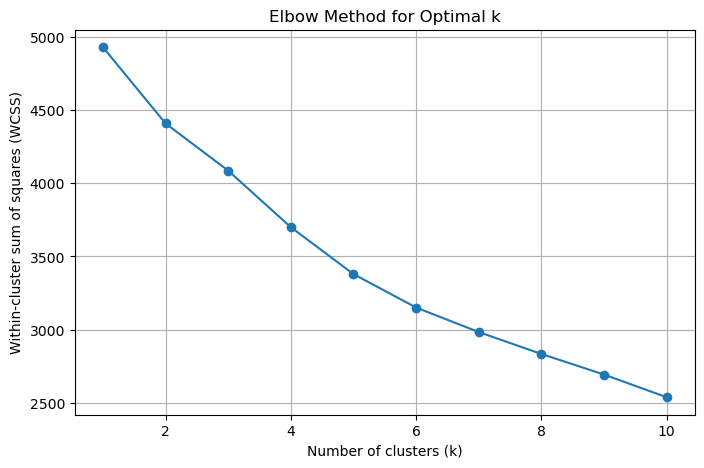

In [193]:
# elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Prepare your data (exclude DV and demographics)
columns_to_exclude = ['Loan_ID','Loan_Status','Gender'] 

cluster_vars = loan_data_clean.drop(columns=columns_to_exclude, errors='ignore')
cluster_vars_encoded = pd.get_dummies(cluster_vars, drop_first=True)

# 2. Standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_vars_encoded)

# 3. Calculate WCSS for a range of k
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# 4. Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [280]:
#  Run KMeans with chosen number of clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=1000)  # change n_clusters=_ to your chosen k
loan_data_clean['Cluster_4'] = kmeans_final.fit_predict(X_scaled)

In [281]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            379 non-null    object 
 1   Gender             379 non-null    object 
 2   Married            379 non-null    object 
 3   Dependents         379 non-null    object 
 4   Education          379 non-null    object 
 5   Self_Employed      379 non-null    object 
 6   ApplicantIncome    379 non-null    int64  
 7   CoapplicantIncome  379 non-null    float64
 8   LoanAmount         379 non-null    float64
 9   Loan_Amount_Term   379 non-null    float64
 10  Credit_History     379 non-null    object 
 11  Property_Area      379 non-null    object 
 12  Loan_Status        379 non-null    object 
 13  Cluster_4          379 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 42.9+ KB


In [282]:
pd.crosstab(loan_data_clean['Cluster_4'],loan_data_clean['Loan_Status'])

Loan_Status,N,Y
Cluster_4,,
0,33,64
1,53,142
2,15,44
3,8,20


In [283]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            379 non-null    object 
 1   Gender             379 non-null    object 
 2   Married            379 non-null    object 
 3   Dependents         379 non-null    object 
 4   Education          379 non-null    object 
 5   Self_Employed      379 non-null    object 
 6   ApplicantIncome    379 non-null    int64  
 7   CoapplicantIncome  379 non-null    float64
 8   LoanAmount         379 non-null    float64
 9   Loan_Amount_Term   379 non-null    float64
 10  Credit_History     379 non-null    object 
 11  Property_Area      379 non-null    object 
 12  Loan_Status        379 non-null    object 
 13  Cluster_4          379 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 42.9+ KB


In [284]:
# cluster profiling
# Drop Loan_ID and Loan_Status as they are not needed for profiling
df_for_profiling = loan_data_clean.drop(columns=['Loan_ID', 'Loan_Status'], errors='ignore')

# Identify numerical and categorical columns
# We will use one-hot encoding for the categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# One-hot encode the categorical variables, then group by cluster and calculate the mean
df_encoded = pd.get_dummies(df_for_profiling, columns=categorical_cols)

# Group by 'Cluster_4' and calculate the mean for all columns
# The mean of the one-hot encoded columns will show the proportion of each category
cluster_profile = df_encoded.groupby('Cluster_4').mean().round(2)

# Transpose the DataFrame for better readability
cluster_profile_transposed = cluster_profile.transpose()

print("Transposed Cluster Profile (Clusters as Columns):")
print(cluster_profile_transposed)

Transposed Cluster Profile (Clusters as Columns):
Cluster_4                      0        1        2        3
ApplicantIncome         3,372.53 3,563.07 3,578.15 4,519.29
CoapplicantIncome       1,086.02 1,214.97 1,116.28   881.43
LoanAmount                 96.31   107.34   109.27   110.25
Loan_Amount_Term          337.09   346.17   335.39   327.17
Gender_Female               0.23     0.30     0.08     0.00
Gender_Male                 0.77     0.70     0.92     1.00
Married_No                  0.47     0.50     0.10     0.04
Married_Yes                 0.53     0.50     0.90     0.96
Dependents_0                0.77     0.85     0.00     0.00
Dependents_1                0.23     0.15     0.00     0.00
Dependents_2                0.00     0.00     1.00     0.00
Dependents_3+               0.00     0.00     0.00     1.00
Education_Graduate          0.79     0.73     0.68     0.57
Education_Not Graduate      0.21     0.27     0.32     0.43
Self_Employed_No            0.91     0.91     0.92

In [286]:
# cluster distribution
loan_data_clean['Cluster_4'].value_counts(normalize=True)

Cluster_4
1   0.51
0   0.26
2   0.16
3   0.07
Name: proportion, dtype: float64

## Cluster Analysis Profiling and Targeting Strategies
### cluster 0 The "Urban Professionals" (26%)
* **Profile**: This group has a moderate income, but is highly concentrated in urban areas with a strong credit history. They are more likely to be single, educated and without dependents. They are seeking loans for smaller and short-term needs.
* **Targeting Strategy**: This is an excellent group for personal loans with attractive, low-interest rates. Since they are in an urban setting, a digital-first marketing approach is best. Promote products like credit cards with travel rewards or low-interest lines of credit for lifestyle expenses or unexpected costs. The marketing message should focus on convenience and flexibility.

### cluster 1 The "Dual-Income, Rural/Semiurban Collaborators" (51%)
* **Profile**: This cluster is defined by its high CoapplicantIncome, indicating a strong two-income household. They have a good credit history and are exclusively located in rural and semi-urban areas. The loans they are taking are of a slightly higher value than Cluster 0, and their demographic is split between married and unmarried.
* **Targeting Strategy**: This group is perfect for joint financial products. Offer home improvement loans for properties in rural areas or joint savings accounts with high-interest yields. Market to them as a team, with a focus on building their shared financial future. A community-based or online campaign highlighting local opportunities would be effective.

### cluster 2 The "Dependents-Focused Professionals" (16%)
* **Profile**: This cluster is a key demographic for a family-focused bank. Their most defining feature is having exactly 2 dependents. They are predominantly male and married, with a very high likelihood of being employed. They have a solid combined income and are taking a moderate loan amount.
* **Targeting Strategy**: This group is a prime candidate for family-oriented financial products. Offer education loans for children's future, car loans for a second family vehicle, or home equity loans for a larger living space. Your marketing should emphasize security, stability, and providing for their family's needs.

### cluster 3 The "High-Earning Breadwinners" (7%)
* **Profile**: This cluster is characterized by the highest average ApplicantIncome, but the lowest CoapplicantIncome, making them single-income households. They are exclusively male and married, with the most dependents (indicated by a 1.0 for Dependents_3+). They are also the most likely to be self-employed.
* **Targeting Strategy**: This group needs financial products to support their large families. Offer high-value mortgages for large homes, life insurance policies, and retirement plans. The marketing should highlight the importance of protecting and providing for their large family, with a message of security and long-term planning. For the self-employed members, you could also offer small business loans or lines of credit.

## Recommendation for the bank
* Prioritise cluster 1 and 2

Cluster 1 represents a financially strong, high-income group. They are the most profitable target due to their ability to handle large loans, making them ideal for high-value products like mortgages and business loans.

Cluster 2 is a reliable, family-oriented group. Their needs for family-related products create a consistent, long-term customer relationship, making them a safe and profitable segment to target.